In [1]:
import numpy as np

In [2]:
inputs = [[1, 2, 3, 4],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

# layer 1 " single neuron"
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
"layer 1 output dim 3x3"

# layer 2
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]
"layer 2 o/p dim 3x3"

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
# input shape is broadcasted by duplicated the row 
print("Output:\n",layer2_outputs,"\n", "Output layer dim:", layer2_outputs.shape)



Output:
 [[ 1.6706  -2.4841  -3.4835 ]
 [ 0.7634  -3.0764  -5.8985 ]
 [-1.38314  1.66994 -0.25515]] 
 Output layer dim: (3, 3)


In [3]:
np.random.seed(42)

X = [[1, 2, 3, 4],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]]

class layer_Dense:
    def __init__(self, n_inputs = None, n_neuron = None):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neuron) # gaussian distro
        # by initializing weights as i/p, n_neuron avoids the transpose in the forward pass

        self.biases = np.zeros((1, n_neuron))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = layer_Dense(n_inputs= 4, n_neuron = 5)
layer2 = layer_Dense(n_inputs= 5, n_neuron= 2)

layer1.forward(X)
print("output of layer1:\n",layer1.output)

layer2.forward(layer1.output)
print("output of layer 2: \n", layer2.output)

output of layer1:
 [[-0.3610963  -0.24283524  0.41654341 -0.8787856  -0.99730016]
 [-0.08384138  0.6059603   0.55190831  0.07959199  0.11448039]
 [-0.24566894  0.37446278  0.16476186 -0.91395312 -0.27462437]]
output of layer 2: 
 [[ 0.0838096   0.04344583]
 [-0.05427832 -0.0786683 ]
 [ 0.07924331 -0.07230373]]


## 5. Hidden Layer Activation Functions

In [ ]:
np.random.seed(42)

X = [[1, 2, 3, 4],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]]

## relu intution
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
# optimized way
output = []
for i in inputs:
    output.append(max(0, i))

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


here


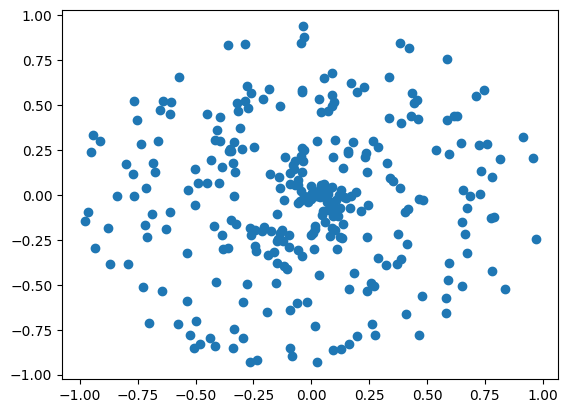

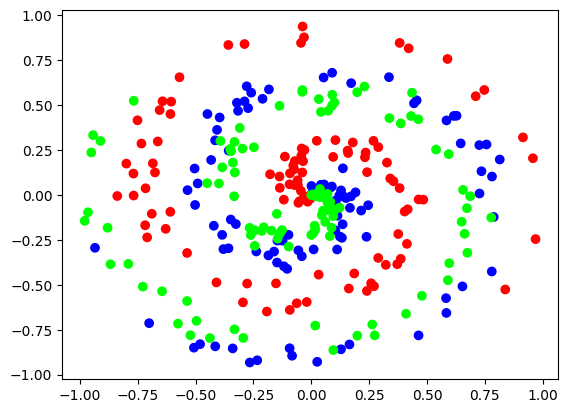

In [ ]:
""" Spiral data """
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype= "uint8")

    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number + 1))
        r = np.linspace(0.0, 1, points) # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number

    return X, y

import matplotlib.pyplot as plt

print("here")
X,y = create_data(100, 3) # 100 feature_sets(inside that we have 2 features) and 3 classes

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c = y, cmap = "brg")
plt.show()


In [ ]:
class layer_Dense:
    def __init__(self, n_inputs = None, n_neuron = None):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neuron) # gaussian distro
        # by initializing weights as i/p, n_neuron avoids the transpose in the forward pass

        self.biases = np.zeros((1, n_neuron))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class activation_Relu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
layer1 = layer_Dense(n_inputs= 2, n_neuron = 5)
activation_1 = activation_Relu()

layer2 = layer_Dense(n_inputs= 5, n_neuron= 2)


layer1.forward(X)
activation_1.forward(layer1.output)
print("output of layer1 before activation:\n",layer1.output, "\n")
print("output of layer1 activation activation:\n",activation_1.output, "\n")



# layer2.forward(layer1.output)
# print("output of layer 2: \n", layer2.output)

output of layer1 before activation:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815841e-04 -7.90404397e-04 -1.33452229e-03  4.65504526e-04
   4.56845892e-05]
 [-2.39994444e-03  5.93467943e-05 -2.24808279e-03  2.03573189e-04
   6.10024276e-04]
 ...
 [ 1.13291515e-01 -1.89262273e-01 -2.06855070e-02  8.11079627e-02
  -6.71350806e-02]
 [ 1.34588354e-01 -1.43197830e-01  3.09493973e-02  5.66337522e-02
  -6.29687395e-02]
 [ 1.07817915e-01 -2.00809631e-01 -3.37579330e-02  8.72561871e-02
  -6.81458780e-02]] 

output of layer1 activation activation:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]